In [1]:
#bank.csv ( it is new dataset )It is example of classification algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
#To load dataset
df=pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
#To check no. of rows and columns
df.shape

(11162, 17)

In [5]:
#Preprocessing 
#To check null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
#To check datatypes of each columns
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

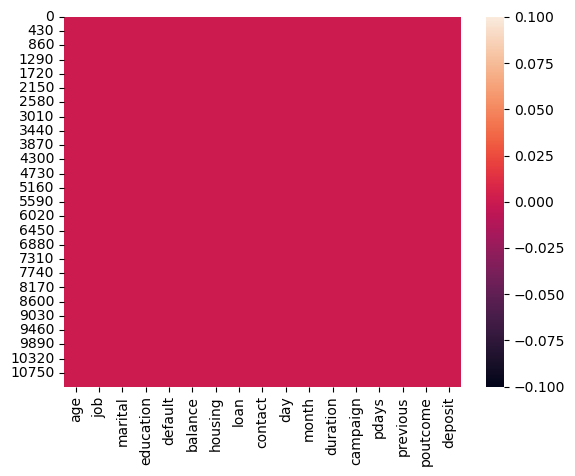

In [7]:
#visualise null values
sb.heatmap(df.isnull())
plt.show()

In [8]:
#2. To check duplicates rows 
df.duplicated().sum()

0

In [9]:
#Check How many samples for 0's (means no subscribe for deposit)
#1's (means subscribe for deposit)
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [10]:
#Select input and output from given dataset
X=df.drop("deposit",axis=1) #select input
Y=df['deposit'] #select output

In [11]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [12]:
#train test split 70% and 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                              random_state=1)

In [13]:
X_train.shape,Y_train.shape

((7813, 16), (7813,))

In [14]:
X_test.shape,Y_test.shape

((3349, 16), (3349,))

In [15]:
#Apply Standard Scaler on X_train and X_test 
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [16]:
X_train

array([[ 2.76552511,  0.15596991, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 1.16824122, -1.0830671 , -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 1.33637636,  1.39500692, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       ...,
       [-1.18565083, -0.77330785, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [-0.00870481, -1.39282635,  1.27358436, ...,  3.07264515,
         4.3350541 , -0.47109973],
       [-0.42904267, -1.0830671 , -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872]])

In [17]:
df['job'].value_counts()

4     2566
1     1944
9     1823
0     1334
7      923
5      778
6      405
8      360
10     357
2      328
3      274
11      70
Name: job, dtype: int64

In [18]:
df['marital'].value_counts()

1    6351
2    3518
0    1293
Name: marital, dtype: int64

In [19]:
df['education'].value_counts()

1    5476
2    3689
0    1500
3     497
Name: education, dtype: int64

In [20]:
#Create a user defined function

#passing Arguments/prameters and return value
def create_model(model) :  #here create_model() user defined function name
    #model is a user defined parameter which hold the object of algorithm
    model.fit(X_train,Y_train) #train the model with 70% training data
    Y_pred=model.predict(X_test) #test the model with 30% input
    #print confusion matrix
    print(confusion_matrix(Y_test,Y_pred))
    #print classification report
    print(classification_report(Y_test,Y_pred))
    return model

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
#Use LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression 

In [23]:
#Create object of LogisticRegression  class
lr=LogisticRegression ()

In [24]:
#call user defined function and passing the parameter lr (object of
#LogisticRegression  class)
lr=create_model(lr)

[[1441  319]
 [ 359 1230]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [25]:
#recall=77% whoch is good but not better 
#use DecisionTreeClassifier class

In [26]:
import os
os.getcwd()

'C:\\Users\\dell'

In [27]:
#10-01-2024
from sklearn.tree import DecisionTreeClassifier

In [28]:
#create object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1) #bydefault use method gini index

In [29]:
#call function
dt=create_model(dt)

[[1407  353]
 [ 372 1217]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [30]:
dict={'Input Columns':X.columns,'IG':dt.feature_importances_ }
#IG means information Gain
#convert dictionary into DataFrame
df1=pd.DataFrame(dict)
#sorting dataframe df1 according to IG column in descending order 
#use inbuilt method sort_values() of pandas library
df1.sort_values('IG',ascending=False) #by default ascending=True 
#means ascending order

,Input Columns,IG
11,duration,0.354008
10,month,0.098357
5,balance,0.084437
0,age,0.077136
9,day,0.076581
8,contact,0.061793
13,pdays,0.047856
6,housing,0.042620
15,poutcome,0.036110
1,job,0.034220


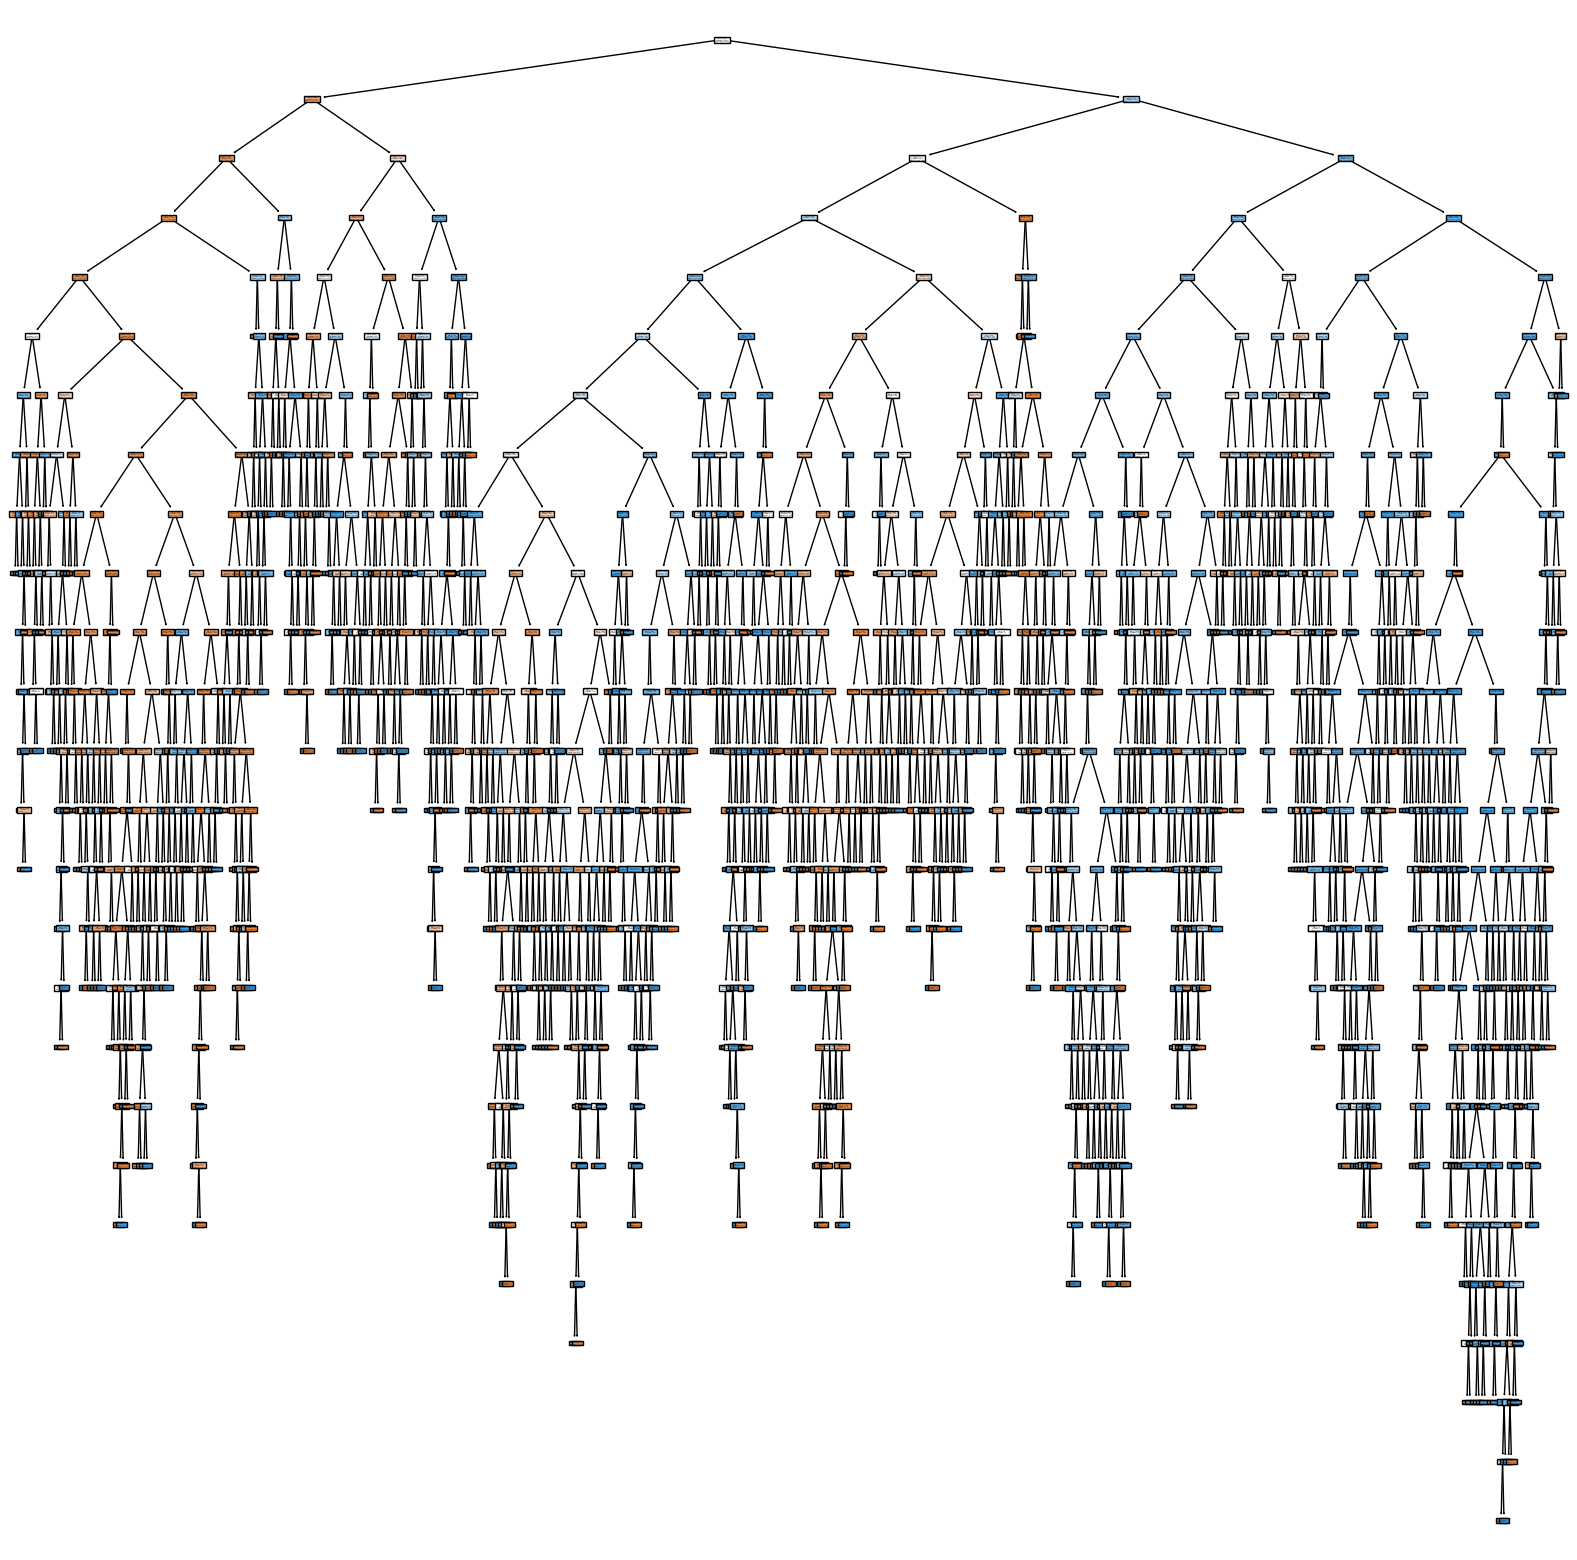

In [31]:
#draw tree
#create a tree 
from sklearn import tree
features=X.columns.tolist()
#to store all input columns in features user defined list object

plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [32]:
#in decisiontree , also recall score =77% (behind the region : overfitting)
#We have to apply Pruning technique to reduced overfitting of model 
#There are 2 types of Pruning Technique of DecisionTreeClassifier class 
#1. max_depth : inbuilt parameter 
#2. min_samples_leaf   : inbuilt parameter 
#leaf means no child

In [33]:
#1. max_depth : inbuilt parameter of DecisionTreeClassifier class 
#Note : max_depth cannot more than 8 
#create the object of DecisionTreeClassifier class and passing the parameter
#max_depth
'''for i in range(1,9): #start i=1 stop =9-1=8 step=+1
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i) 
    #method bydefault use gini index
    #call function 
    print("Max depth : ",i)
    print("Confusion Matrix and Classification report")
    dt1=create_model(dt1)'''

dt1=DecisionTreeClassifier(random_state=1,max_depth=5) 
#method bydefault use gini index
#call function 
print("Confusion Matrix and Classification report")
dt1=create_model(dt1)

Confusion Matrix and Classification report
[[1316  444]
 [ 228 1361]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349



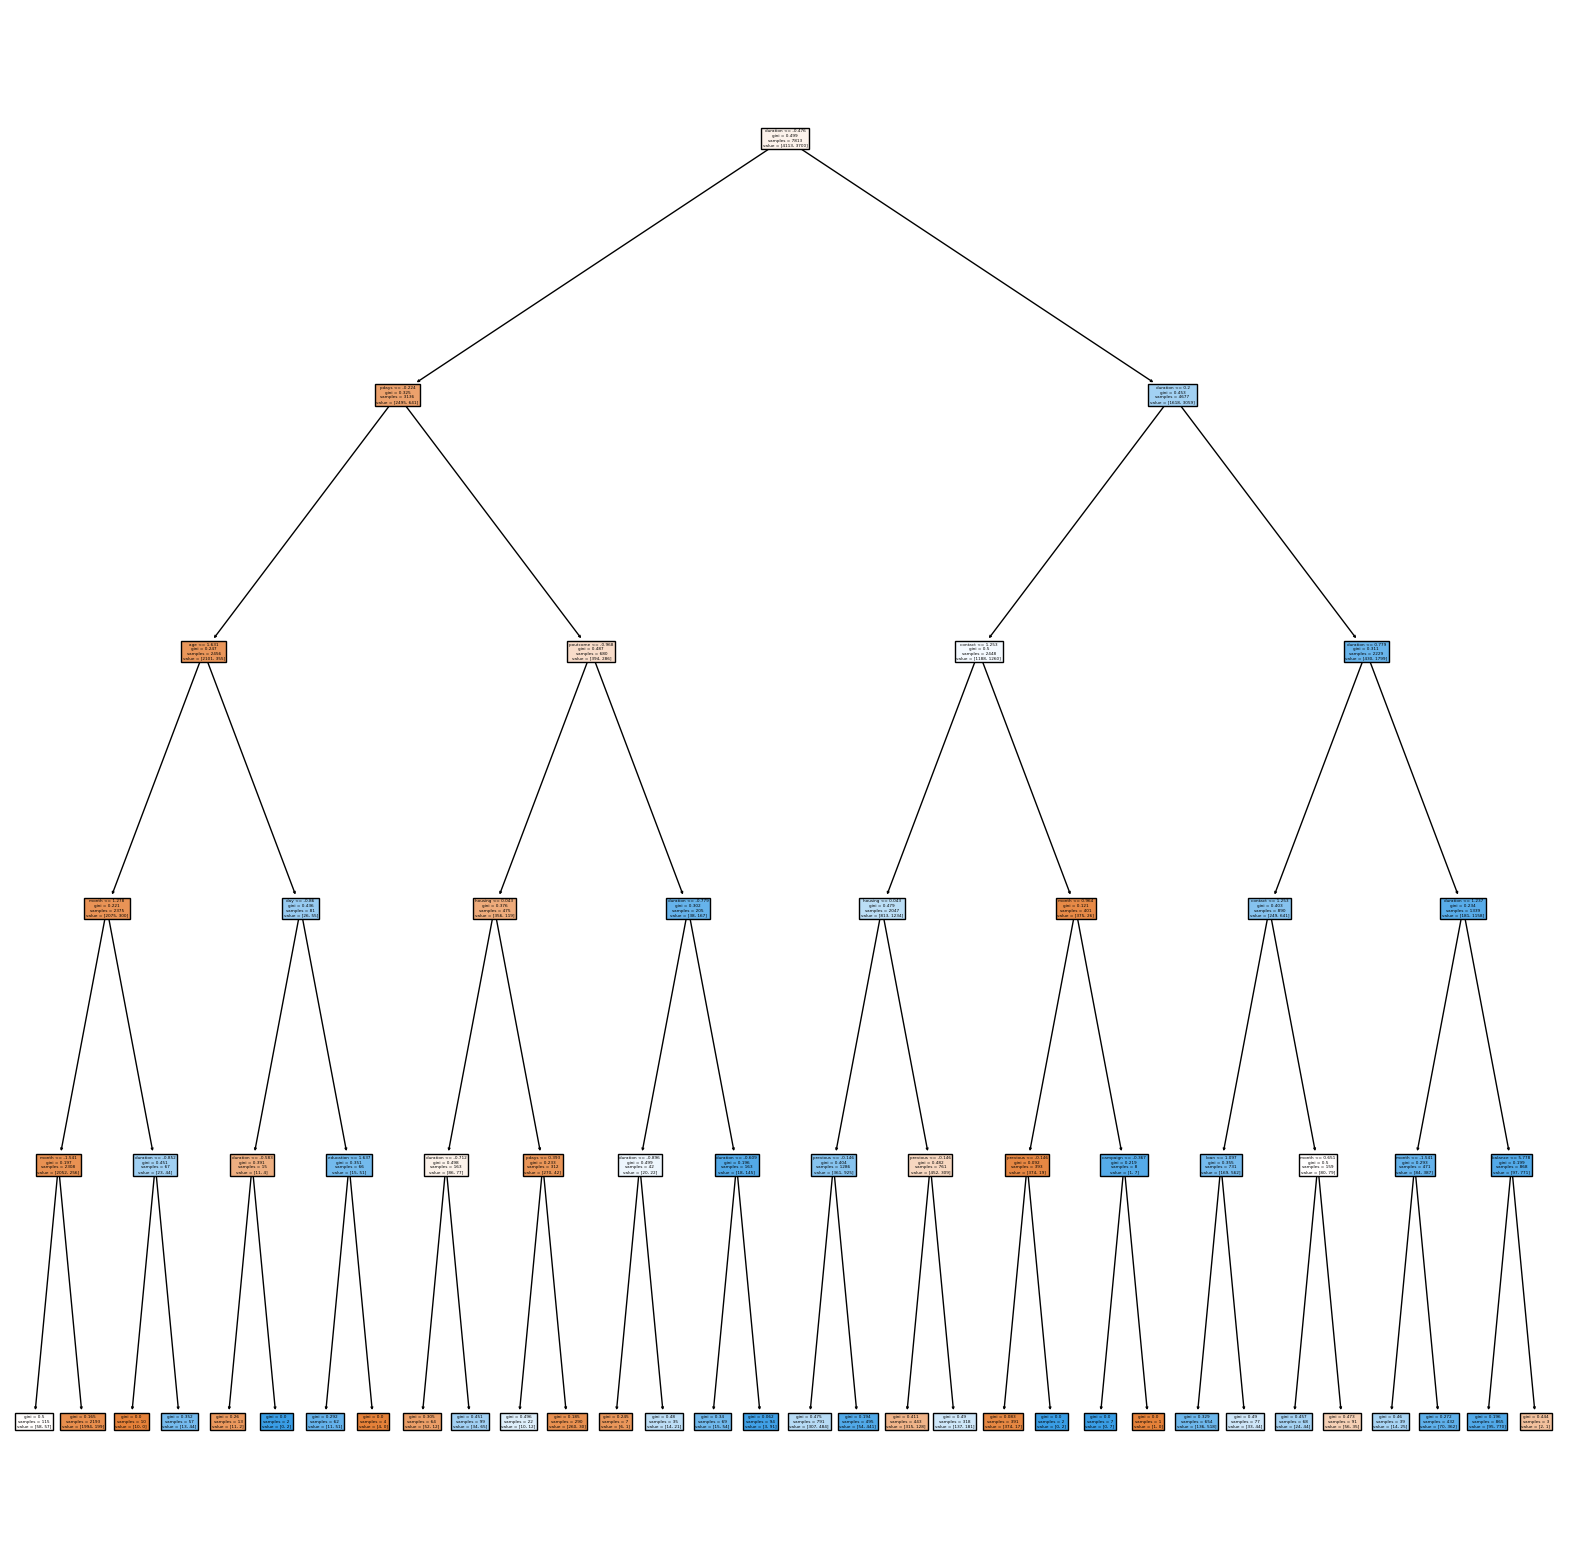

In [34]:
features=X.columns.tolist()
#to store all input columns in features user defined list object

plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [35]:
#MAX DEPTH =5 WITH GIN INDEX  : RECALL SCORE=86% AND ACCURACY=80%
#SCORE IS VERY GOOD

In [36]:
#use Entropy method with decisiontree class
#for i in range(1,9): #start i=1 stop =9-1=8 step=+1
dt1=DecisionTreeClassifier(random_state=1,max_depth=6,
                               criterion='entropy') 
#method bydefault use gini index
#call function 

print("Confusion Matrix and Classification report")
dt1=create_model(dt1)

Confusion Matrix and Classification report
[[1364  396]
 [ 298 1291]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1760
           1       0.77      0.81      0.79      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [37]:
#second pruning technique : min_samples_leaf    inbuilt parameter of
#DecisionTreeClassifier class 
#leaf means no child 
#min_samples_leaf :  min 45  and max =100


In [38]:
#create the object of DecisionTreeClassifier class and passing the parameter
#min_samples_leaf
'''for i in range(45,101): #start i=45 stop =101-1=100 step=+1
    dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=i) 
    #method bydefault use gini index
    #call function 
    print("min samples leaf : ",i)
    print("Confusion Matrix and Classification report")
    dt1=create_model(dt1)'''

'for i in range(45,101): #start i=45 stop =101-1=100 step=+1\n    dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=i) \n    #method bydefault use gini index\n    #call function \n    print("min samples leaf : ",i)\n    print("Confusion Matrix and Classification report")\n    dt1=create_model(dt1)'

In [39]:
#create the object of DecisionTreeClassifier class and passing the parameter
#min_samples_leaf

dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=45) 
#method bydefault use gini index
#call function 

print("Confusion Matrix and Classification report")
dt1=create_model(dt1)

Confusion Matrix and Classification report
[[1379  381]
 [ 204 1385]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [40]:
features=X.columns.tolist()
#to store all input columns in features user defined list object

plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt1,feature_names=features,filled=True)

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [41]:
#best method in this dataset(bank.csv)
#DecisionTreeClassifier(Gini Index) with min_samples_leaf=45
#recall score=87% and accuracy=83%

In [42]:
#Ensembling Technique : -
#1. Bootstraping :-
#RandomForestTree (use Bagging)
#inbuilt class RandomForestClassifier -->define in inbuilt outer class
#ensemble  -->inbuilt package sklearn
from sklearn.ensemble import RandomForestClassifier 

In [43]:
'''for i in range(10,101):  #start i=10  stop=101-1=100 and step=+1
    #train on minimum 10 decision tree and max 100 
    #create object of RandomForestClassifier  class
    rfc=RandomForestClassifier(random_state=1,n_estimators=i)
    #n_estimators inbuilt parameter of RandomForestClassifier  class
    #how many no. of decisiontree for train the model
    print("No. of decision Tree : ",i)
    #call function
    rfc=create_model(rfc)'''

#create object of RandomForestClassifier  class and passing the value of 
#n_estimators parameters =65 
rfc=RandomForestClassifier(random_state=1,n_estimators=65)
#n_estimators inbuilt parameter of RandomForestClassifier  class
    #how many no. of decisiontree for train the model
#call function
rfc=create_model(rfc)    

[[1435  325]
 [ 193 1396]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [44]:
rfc.feature_importances_

array([0.08749828, 0.03986482, 0.01960524, 0.02217122, 0.00137422,
       0.08911558, 0.03326097, 0.01027073, 0.03993372, 0.07157137,
       0.08313332, 0.3607039 , 0.0332358 , 0.05116325, 0.01900209,
       0.0380955 ])

In [45]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [46]:
#recall score=88% (0.88)
#accuracy =0.85(85%)

In [47]:
#Boosting : next Ensembling technique :- It is also work on DecisionTree
#classifier
#1. ADA Boost :  Adaptor boosting
#ada BOOST work on decision stump
#what is decision stump?
#decision stump means one root node and 2 leaf node

#use inbuilt class AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [48]:
X.shape

(11162, 16)

In [49]:
'''for i in range(1,17):  #start i=1  stop=17-1
    #create object of AdaBoostClassifier class and passing the parameter
    #n_estimators (means how many decision stump) 
    #decision stump depends on input(information gain)
    ada=AdaBoostClassifier(random_state=1,n_estimators=i)
    print("No. of decision stump means no. of inputs ",i)
    #call function 
    ada=create_model(ada)'''
#create object of AdaBoostClassifier class and passing the parameter
#n_estimators (means how many decision stump) 
#decision stump depends on input(information gain)
ada=AdaBoostClassifier(random_state=1,n_estimators=3)
    
#call function 
ada=create_model(ada)
ada.feature_importances_ #to show information gain of each features

[[1262  498]
 [ 310 1279]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349



array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       0.        , 0.66666667, 0.        , 0.        , 0.        ,
       0.        ])

In [50]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [51]:
#2. GradientBoosting Algorithm : Second Technique of Boosting 
#Its create a fully grown tree (with the help of Gini or Entropy )
#and its focus on past errors (short coming error)

#use inbuilt class GradientBoostingClassifier : which define in outer class ensemble
from sklearn.ensemble import GradientBoostingClassifier 

In [55]:
#create object of GradientBoostingClassifier  class and passing the parameter
#n_estimators means how many decision tree 
#min 10 decision tree and max =100 decision tree

'''for i in range(10,101): #start =1 stop=101-1=100 step=+1 
    gbc=GradientBoostingClassifier (random_state=1,n_estimators=i)
    print("No. of decision tree : ",i)
    #call function
    gbc=create_model(gbc)'''


gbc=GradientBoostingClassifier (random_state=1,n_estimators=72)
   
#call function
gbc=create_model(gbc)

[[1438  322]
 [ 230 1359]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1760
           1       0.81      0.86      0.83      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



In [ ]:
#72 : Recall score =86% and accuracy=84%

In [56]:
#3. Extreame Gradient Boosting : 3rd technique of Boosting 
#install first time inbuilt package xgboost 
#!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 99.8/99.8 MB 3.7 MB/s eta 0:00:00


In [57]:
from xgboost import XGBClassifier
#XGBClassifier inbuilt class which define in inbuilt package xgboost

In [60]:
#create object of XGBClassifier class and passing the parameter n_estimators means train how
#many decision tree and passing the second parameter reg_alpha=1 means true means handle
#overfitting of model automatic

#min n_estimators=10 and max=100
'''for i in range(10,101):
    xgb=XGBClassifier(random_state=1,n_estimators=i,reg_alpha=1)
    print("No. of Estimators means trees : ",i)
    #call function
    xgb=create_model(xgb)'''

xgb=XGBClassifier(random_state=1,n_estimators=30,reg_alpha=1)
#call function
xgb=create_model(xgb)

[[1459  301]
 [ 182 1407]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1760
           1       0.82      0.89      0.85      1589

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



In [ ]:
#best algorithm for bank.csv dataset
#accuracy =86% and Recall : 89% 